In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [8]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [9]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [10]:
pct_to_target[:10]

array([0.98, 0.83, 0.93, 0.71, 1.04, 1.14, 1.02, 1.14, 1.1 , 1.1 ])

In [11]:
len(pct_to_target)

500

In [12]:
sales_target_values = [75_000, 100_100, 200_200, 300_300, 400_400, 500_500]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [16]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [17]:
df.head()

,Pct_To_Target,Sales_Target,Sales
0,0.98,300300,294294.0
1,0.83,400400,332332.0
2,0.93,75000,69750.0
3,0.71,300300,213213.0
4,1.04,300300,312312.0


In [18]:
def calc_commision_rate(x):
    """
    0-90% = 2%
    91 - 99% = 3%
    >= 100% = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04   

In [19]:
df['Comission_Rate'] = df.Pct_To_Target.apply(calc_commision_rate)
df['Comission_Amount'] = df.Comission_Rate * df['Sales']

In [20]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Comission_Rate,Comission_Amount
0,0.98,300300,294294.0,0.03,8828.82
1,0.83,400400,332332.0,0.02,6646.64
2,0.93,75000,69750.0,0.03,2092.50
3,0.71,300300,213213.0,0.02,4264.26
4,1.04,300300,312312.0,0.04,12492.48


In [23]:
all_stats = []

for i in range(num_simulations):
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    df['Comission_Rate'] = df.Pct_To_Target.apply(calc_commision_rate)
    df['Comission_Amount'] = df.Comission_Rate * df['Sales']
    
    all_stats.append([df.Sales.sum().round(0),
                      df.Comission_Amount.sum().round(0),
                      df.Sales_Target.sum().round(0)])

In [24]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Comission_Amount',
                                                           'Sales_Target'
    
])

In [25]:
results_df.describe().style.format('{:,}')

,Sales,Comission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,967,593.264","2,866,629.08","83,951,573.8"
std,"2,725,612.149071694","103,884.6005504913","2,671,691.783050054"
min,"76,422,891.0","2,575,728.0","76,615,000.0"
25%,"82,162,474.5","2,798,990.0","82,120,500.0"
50%,"83,884,003.5","2,860,246.0","83,847,300.0"
75%,"85,717,754.25","2,932,204.25","85,750,100.0"
max,"91,494,708.0","3,130,262.0","92,256,900.0"


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Comission_Amount'}>],
       [<Axes: title={'center': 'Sales_Target'}>, <Axes: >]], dtype=object)

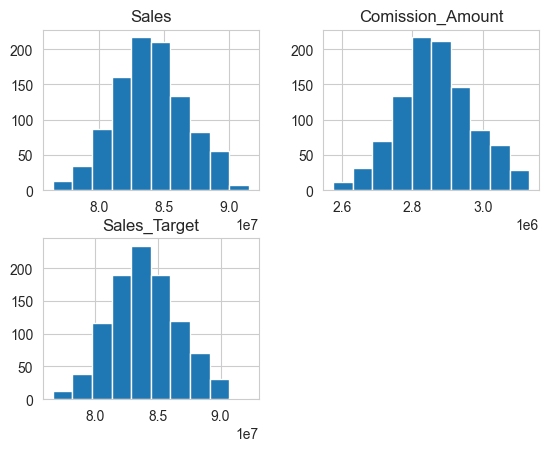

In [28]:
 results_df.hist()